# **METEHAN DÜNDAR**
Introduction to Data Science

Assignment 2 Part 1

Mixed effect ANOVA

# Research Problem
Given the dataset and context of the study, a suitable research question that involves casuality could be formulated as follows:

**In light of the random effect  of various schools, to what extent does the application of several different methods of teaching generate significant differences in student performance?**

The purpose of this research topic is to study the causal link between teaching techniques (independent variable) and student performance (dependent variable), while taking into consideration the diversity introduced by various institutions. It is designed to determine if a change in teaching techniques is a direct cause of any observed changes in student performance.



# Exploratory Analysis

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/sample_data/test.csv' # Replace with your file path
data = pd.read_csv(file_path)

# Summary statistics
summary_stats = data.groupby(['ttt', 'school']).describe()['test']
print(summary_stats, "\n")

            count   mean       std  min    25%   50%    75%  max
ttt school                                                      
1   1        20.0  6.365  0.358762  5.6  6.175  6.30  6.625  7.0
    2        20.0  5.210  0.478924  4.5  4.875  5.15  5.425  6.3
    3        20.0  3.880  0.495878  3.0  3.600  3.90  4.125  5.0
    4        20.0  5.285  0.410744  4.6  4.975  5.35  5.525  6.0
    5        20.0  5.590  0.407689  5.2  5.300  5.40  5.825  6.4
    6        20.0  5.150  0.398021  4.4  5.000  5.20  5.325  5.9
    7        20.0  4.370  0.565778  3.6  3.900  4.30  4.750  5.5
2   8        20.0  8.035  0.551815  7.1  7.775  7.95  8.400  9.0
    9        20.0  6.810  0.482210  6.2  6.400  6.70  7.050  7.6
    10       20.0  5.725  0.556185  4.6  5.475  5.70  6.025  7.0
    11       20.0  4.070  0.546857  2.7  3.700  4.10  4.400  5.1
    12       20.0  7.520  0.475284  6.3  7.375  7.55  7.825  8.1
    13       20.0  6.355  0.574433  5.2  5.975  6.30  6.725  7.6
    14       20.0  6.440 

The summary statistics give a brief overview of the performance scores, which are organised by teaching style and school. Mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum are all included. This can aid in the identification of any trends or variances in the data.

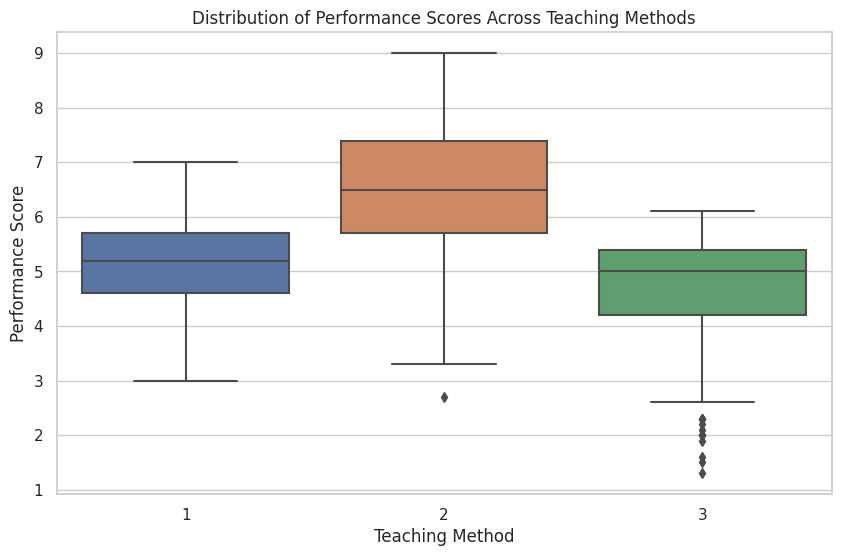

In [41]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting the distribution of performance scores across different teaching methods
plt.figure(figsize=(10, 6))
sns.boxplot(x='ttt', y='test', data=data)
plt.title('Distribution of Performance Scores Across Teaching Methods')
plt.xlabel('Teaching Method')
plt.ylabel('Performance Score')
plt.show()

The box plot depicts the dispersion and central tendency of each teaching method's performance scores. The median, interquartile range, and probable outliers may all be seen. This graph is useful because it depicts whether or not there are discernible changes in scores for performance between various methods of teaching.  The graph shows some variations in median scores and distribution ranges between methods, but the overlap in interquartile ranges implies that these discrepancies may not be significant.

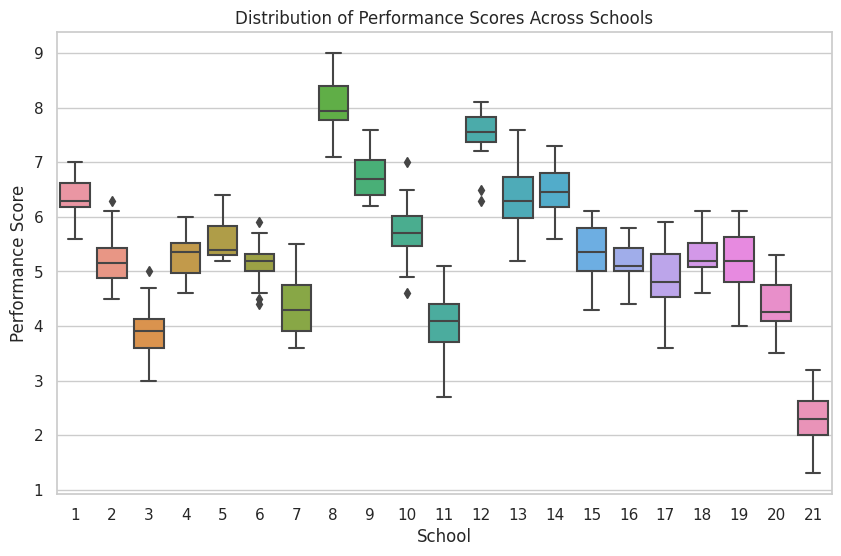

In [42]:
# Plotting the distribution of performance scores across different schools
plt.figure(figsize=(10, 6))
sns.boxplot(x='school', y='test', data=data)
plt.title('Distribution of Performance Scores Across Schools')
plt.xlabel('School')
plt.ylabel('Performance Score')
plt.show()

This boxplot depicts how performance scores differ between schools. It illustrates the median, range, and potential outliers in each school's performance outcomes.  This is relevant to our study issue since it shows the variation in student performance between schools. The map shows that certain schools have greater or lower median scores than others, and there is a lot of variation in terms of dispersion and outliers. When assessing the influence of teaching techniques, this heterogeneity is critical since it implies that the school's setting may have a substantial role in student achievement.

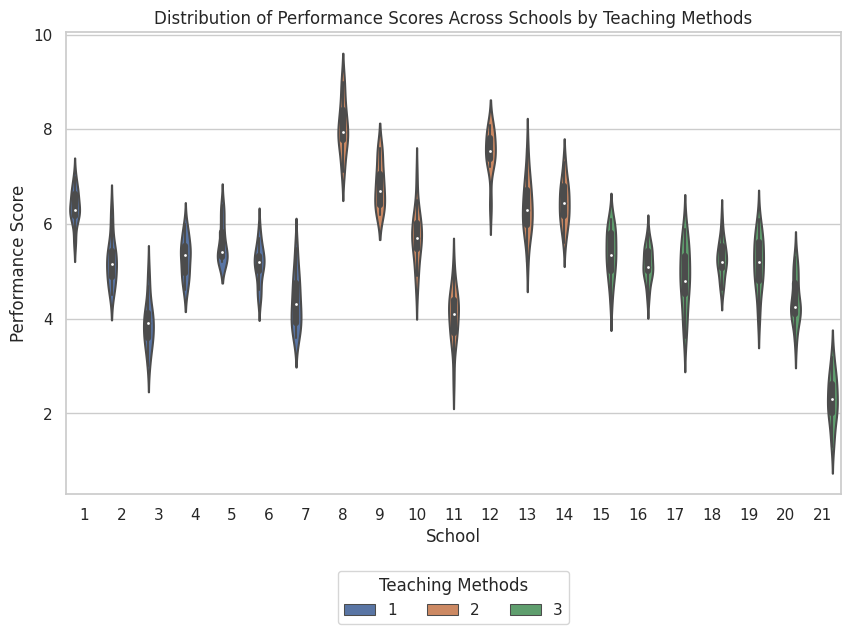

In [43]:
# Plotting the distribution of performance scores across different schools with data segmented by teaching methods
plt.figure(figsize=(10, 6))
sns.violinplot(x='school', y='test', data=data, hue='ttt')
plt.legend(title='Teaching Methods', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(data['school'].unique()))
plt.title('Distribution of Performance Scores Across Schools by Teaching Methods')
plt.xlabel('School')
plt.ylabel('Performance Score')
plt.show()

This figure has elements of both a boxplot and a kernel density plot. It gives a more detailed perspective of the distribution by displaying the density of scores at various values. We may compare distributions among teaching approaches within each school using the split violin plot. This plot can highlight not just the distribution's fundamental trends, but also its form.


# Formal Analysis


Statistical Model Formulation
---
The two-factor ANOVA with random effects model for this scenario can be expressed as follows:


$Y_{ijk}= \mu + \alpha _{j} + \beta _{k} + (\alpha \beta)_{jk} + \epsilon _{ijk}$
where:
*   $Y_{ijk}$ is is the performance score of the $i$-th student taught using the $j$-th teaching method in the $k$-th school.
*   $\mu$ is the overall mean performance score.
*   $\alpha _{j}$ is the fixed effect of the $j$-th teaching method.
*   $\beta _{k}$ is the random effect of the $k$-th school.
*   $(\alpha \beta)_{jk}$ is the interaction effect between the $j$-th teaching method and the $k$-th school.
*   $\epsilon _{ijk}$ is the random error component.

Null and Alternative Hypotheses
---



*   For fixed effect (teaching method):
  *   Null Hypothesis ($H_0$): All the teaching methods have the same effect on student performance. ($\alpha _{1} = \alpha _{2} = \alpha _{3} = 0$)
  *   Alternative Hypothesis ($H_1$): At least one teaching method has a different effect on student performance. ($\alpha _{j} \neq 0$)

*   For random effect (school):
  *   Null Hypothesis ($H_0$): There is no variability in student performance scores, among different schools. ($\sigma_{\beta }^{2} = 0$)
  *   Alternative Hypothesis ($H_1$): There is variability in student performance scores, among different schools. ($\sigma_{\beta }^{2} > 0$)

Summary of the Dataset
---

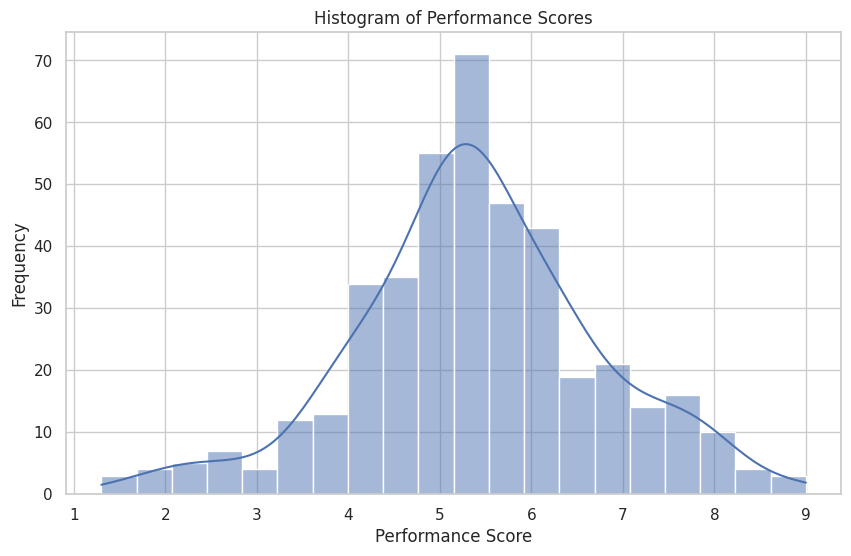

,test,ttt,school
count,420.000000,420.00000,420.000000
mean,5.397381,2.00000,11.000000
std,1.340116,0.81747,6.062522
min,1.300000,1.00000,1.000000
25%,4.700000,1.00000,6.000000
50%,5.300000,2.00000,11.000000
75%,6.200000,3.00000,16.000000
max,9.000000,3.00000,21.000000


In [44]:
# Descriptive statistics of the dataset
descriptive_stats = data.describe()

# Visualization: Histogram of performance scores
plt.figure(figsize=(10, 6))
sns.histplot(data['test'], kde=True)
plt.title('Histogram of Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Frequency')
plt.show()

descriptive_stats

Descriptive Statistics:
* Count: There are 420 observations in the dataset.
* Mean Performance Score: The average performance score is approximately 5.40.
* Standard Deviation: The standard deviation of the performance scores is about 1.34, indicating variability in the scores.
* Minimum Score: The lowest recorded score is 1.3.
* Maximum Score: The highest recorded score is 9.0.
* Quartiles: The 25th percentile is at 4.7, the median (50th percentile) is at 5.3, and the 75th percentile is at 6.2.

Histogram of Performance Scores:
* The histogram illustrates the distribution of performance scores.
* It shows a somewhat normal distribution with a slight left skew.
* This visualization helps in understanding the spread and central tendency of the performance scores.

ANOVA Analysis
---
The results of the mixed linear model, which is appropriate for our two-factor ANOVA with random effects, are as follows:

In [45]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import mixedlm

# Define the formula for mixed-effects ANOVA
formula = 'test ~ ttt'

# Defining the model: 'test' as dependent variable, 'ttt' as fixed effect and 'school' as random effect
model = smf.mixedlm(formula, data, groups=data["school"])

# Fitting the model
result = model.fit()

# Displaying the results
print(result.summary())


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: test     
No. Observations: 420     Method:             REML     
No. Groups:       21      Scale:              0.2425   
Min. group size:  20      Log-Likelihood:     -349.7142
Max. group size:  20      Converged:          Yes      
Mean group size:  20.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     5.870    0.749  7.835 0.000  4.402  7.339
ttt          -0.236    0.347 -0.682 0.495 -0.916  0.443
Group Var     1.672    1.136                           



1.   **Fixed Effect - Teaching Method ('ttt'):**
  The p-value for the teaching method is 0.495, which is greater than the conventional significance level of 0.05. This indicates that the fixed effect of the teaching method is not statistically significant. In other words, the null hypothesis that all teaching methods have the same effect on student performance cannot be rejected based on this data.


2.   **Random Effect - School:**
  The variance component for the random effect of schools is 1.672, suggesting that there is a significant variability in performance scores across different schools.

# Conclusion

Based on the mixed effect ANOVA analysis, the following conclusions can be drawn:

1. Effect of Teaching Methods: The analysis did not find statistically significant differences in student performance scores due to the teaching methods used. The p-value for the teaching method's effect was 0.495, which is above the conventional threshold of 0.05 for statistical significance. This implies that the changes in teaching methods, as categorized in this study, do not have a substantial impact on student performance scores. Therefore, we cannot assert that different teaching methods cause significant differences in student performance.

2. Variability Across Schools: The analysis revealed significant variability in student performance across different schools. This suggests that factors specific to each school, which could include resources, environment, student demographics, teaching staff, and other school-related variables, have a more pronounced impact on student performance than the teaching methods themselves.

# Discussion

The dataset study, which attempted to explore the impact of teaching approaches on student performance across varied institutions, yielded interesting discoveries but raised serious concerns. Despite the lack of statistical significance, the influence of teaching methods on student performance may have practical implications that the study's sample size or data variability may not reflect. Furthermore, the significant diversity in performance among schools highlights the critical impact of school-specific factors such as resources, teacher quality, and student demographics, implying the need for tailored interventions.

Certain limits and assumptions in the study, however, should be addressed. The mixed effects model assumes normality, independence, and homoscedasticity, and interactions between teaching techniques and schools are not taken into account. It is critical to generalise the findings beyond the unique dataset and to exercise caution owing to potential biases in data collecting and measurement accuracy. The study advises for more research into additional variables such as student background and teacher-student ratio, as well as longitudinal studies to reveal the long-term effects of various teaching approaches. In summary, the approach emphasises the complexities of educational research, emphasising the importance of nuanced interpretation and consideration of diverse aspects other than statistical findings.

